# Tarefa do Dataset do Grupo

O dataset escolhido pelo grupo foi "Life Expectancy" que se encontra https://www.kaggle.com/datasets/augustus0498/life-expectancy-who?select=led.csv.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, plot_confusion_matrix,ConfusionMatrixDisplay
from sklearn.ensemble import GradientBoostingRegressor

## **Import Dataset & First Analysis**

In [21]:
df = pd.read_csv("dataset/led.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       2938 non-null   object 
 1   Year                          2938 non-null   int64  
 2   Status                        2938 non-null   object 
 3   Lifeexpectancy                2928 non-null   float64
 4   AdultMortality                2928 non-null   float64
 5   infantdeaths                  2938 non-null   int64  
 6   Alcohol                       2744 non-null   float64
 7   percentageexpenditure         2938 non-null   float64
 8   HepatitisB                    2385 non-null   float64
 9   Measles                       2938 non-null   int64  
 10  BMI                           2904 non-null   float64
 11  under-fivedeaths              2938 non-null   int64  
 12  Polio                         2919 non-null   float64
 13  Tot

In [22]:
df.describe()

,Year,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


### *Missing values:*

In [23]:
df.isnull().sum()

Country                           0
Year                              0
Status                            0
Lifeexpectancy                   10
AdultMortality                   10
infantdeaths                      0
Alcohol                         194
percentageexpenditure             0
HepatitisB                      553
Measles                           0
BMI                              34
under-fivedeaths                  0
Polio                            19
Totalexpenditure                226
Diphtheria                       19
HIV/AIDS                          0
GDP                             448
Population                      652
thinness1-19years                34
thinness5-9years                 34
Incomecompositionofresources    167
Schooling                       163
dtype: int64

<AxesSubplot:>

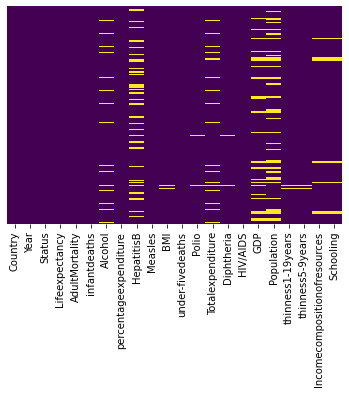

In [24]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='viridis')

### *Correlation*


<AxesSubplot:>

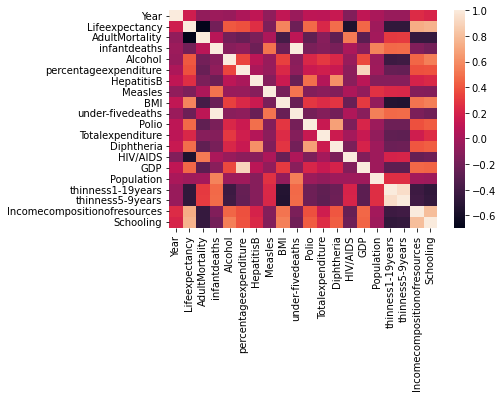

In [25]:
sns.heatmap(df.corr())

### *Outliers*

## **Preprocessing**

### *Handling Missing Values*

1) Drop Line

<AxesSubplot:>

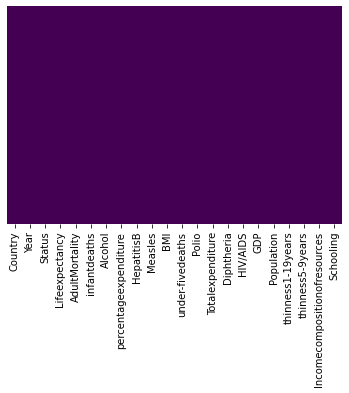

In [26]:
df = df.dropna()
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='viridis')

2) Replace with Mean

In [27]:
#df.fillna(df.mean(), inplace=True)
#sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       1649 non-null   object 
 1   Year                          1649 non-null   int64  
 2   Status                        1649 non-null   object 
 3   Lifeexpectancy                1649 non-null   float64
 4   AdultMortality                1649 non-null   float64
 5   infantdeaths                  1649 non-null   int64  
 6   Alcohol                       1649 non-null   float64
 7   percentageexpenditure         1649 non-null   float64
 8   HepatitisB                    1649 non-null   float64
 9   Measles                       1649 non-null   int64  
 10  BMI                           1649 non-null   float64
 11  under-fivedeaths              1649 non-null   int64  
 12  Polio                         1649 non-null   float64
 13  Tot

### *Handling categorical data*

1) Drop both

In [29]:
df_both_drop = df.drop(['Country','Status'], axis=1)

2) Drop Only Country

In [30]:
df_country_drop = df.drop(['Country'], axis=1)

labels_status = df_country_drop['Status'].astype('category').cat.categories.tolist()
replace_map_status = {'Status' : {k: v for k,v in zip(labels_status, list(range(1,len(labels_status)+1)))}}
df_country_drop.replace(replace_map_status, inplace=True)
df_country_drop.head()

,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,...,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
0,2015,2,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,2,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,2,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,2,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


3) Drop Only State

In [31]:
df_status_drop = df.drop(['Status'], axis=1)

labels_country = df_status_drop['Country'].astype('category').cat.categories.tolist()
replace_map_country = {'Country' : {k: v for k,v in zip(labels_country, list(range(1,len(labels_country)+1)))}}
df_status_drop.replace(replace_map_country, inplace=True)
df_status_drop.head()

,Country,Year,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,...,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
0,1,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,1,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,1,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,1,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


4) Drop Nothing

In [32]:
df_nothing_drop = df.copy()
df_nothing_drop.replace(replace_map_status, inplace=True)
df_nothing_drop.replace(replace_map_country, inplace=True)
df_nothing_drop.head()

,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,...,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
0,1,2015,2,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,1,2014,2,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,1,2013,2,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,1,2012,2,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,1,2011,2,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


**Ideia: Drop Pais e Drop Ano**

## **Regression Models**

In [33]:
X = df_nothing_drop.drop(['Lifeexpectancy'], axis=1)
y = df_nothing_drop['Lifeexpectancy']

gridsearch = False
linear = True
svr = False
ridge = False
sgd = False

### *Regression Algorithm & Fit Model*

In [35]:
if(not(gridsearch)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=2022)
    
    if(linear):
        lm = LinearRegression()
        lm.fit(X_train, y_train)
        
    elif(svr):
        
        
    elif(ridge):
        
        
    elif(sgd):
        

## **Model Evaluation**

mean square error: 12.896998423929737
mean absolute error: 2.6740141467389313
root mean square error: 3.5912391209622534


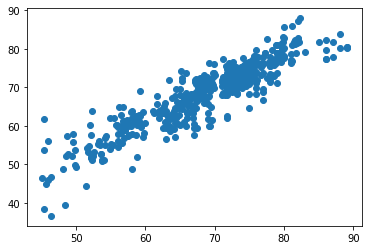

In [36]:
if(not(gridsearch)):
    if(linear):
        y_pred = lm.predict(X_test)

        plt.scatter(y_test,y_pred)
        plt.x = "Y Expected"
        plt.y = "Y Predicted"
    
        print("mean square error: "+ str(mean_squared_error(y_test, y_pred)))
        print("mean absolute error: "+ str(mean_absolute_error(y_test, y_pred)))
        print("root mean square error: "+ str(mean_squared_error(y_test, y_pred, squared= False)))

## **GridSearch**

In [37]:
if(gridsearch):
    
    
    
    
    
    
    
    parameters = {'fit_intercept': [True, False], 'normalize': [True, False], 'positive': [True, False],'copy_X': [True, False]}
    
    scoring = ['neg_mean_squared_error','f1_score']
    
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

    grid = GridSearchCV(lm,parameters,scoring=scoring,n_jobs=-1, cv=cv)

    result = grid.fit(X_train,y_train)

    print(" ************************************************************************************************ " )
    print(" Results from Grid Search " )
    print("\n The best estimator across ALL searched params:\n",result.best_estimator_)
    print("\n The best score across ALL searched params:\n",result.best_score_)
    print("\n The best parameters across ALL searched params:\n",result.best_params_)
    print(" ************************************************************************************************ " )
